# Hypothyroidism Prediction

Overview 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

## Research Question

To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Metric of success

To be able to identify factors that are most important in identifying hypothyroidism and making predictions with high accuracy scores.

# Understanding the Context

The dataset used in this project was provided by Nairobi Hospital during a clinical camp that was meant to test for hypothyroidism. 

The data collected focused on Thyroid patients.

# Experimental Design

1. Loading the Dataset

2. Exploring the dataset

3. Cleaning the dataset

4. Modelling using Random Forest, ADA Boosting, Gradient Boosting and Support Vector Machines

5. Testing the accuracy and applicability of the models

6. Conclusion and Recommendation

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report


In [ ]:
# Loading our data frame
url = "http://bit.ly/hypothyroid_data"

# reading the dataframe
hypo = pd.read_csv(url)

# previewing
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# checking the number of columns
hypo.shape

# the dataframe has 26 collumns and 3163 rows

(3163, 26)

In [ ]:
# checking columns
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# checking summary statistics
hypo.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
# checking for info
hypo.info()

# all the data types are objects 
# The age, TSH, T3, TT4, T4U, FTI and TBG are expected to be numerical so we will do a value count to confirm its values
# we will need to convert the data types to integers by using label encoder for machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# checking for duplicates
hypo.duplicated().sum()

# there are 77 duplicated records

77

In [ ]:
# dropping duplicates
hypo = hypo.drop_duplicates(subset=None, keep='first', inplace=False)


In [ ]:
#exploring our unique identifier
hypo['status'].value_counts()

negative       2945
hypothyroid     141
Name: status, dtype: int64

In [ ]:
# confirming after dropping duplicates
hypo.duplicated().sum()

# all duplicates have been dropped

0

In [ ]:
# checking for missing values
hypo.isnull().sum()

# there are no missing values

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Target variable: "status" == "hypothyroid"

Some Patients had hypothyroid and other tested negative for the same. We are to predict values for ("status" == "hypothyroid").

We do a value counts to check the composition of our variables

In [ ]:
# Value count for status column
print(hypo['status'].value_counts())

negative       3012
hypothyroid     151
Name: status, dtype: int64


In [ ]:
# Value count for age column
print(hypo['age'].value_counts())

# there are 446 entries that were captured as "?"; these need to be replaced with appropriate values
# we will replace the ? values with mean

?     446
59     64
60     64
62     63
28     60
     ... 
5       1
8       1
7       1
4       1
93      1
Name: age, Length: 93, dtype: int64


In [ ]:
# value count for sex column
print(hypo['sex'].value_counts())
# there are 73 entries captured as "?", we will replace them with appropriate values
# these will be dropped

F    2182
M     908
?      73
Name: sex, dtype: int64


In [ ]:
# valie countfor on thyroxine
hypo['on_thyroxine'].value_counts()

# f = 2702 people do not take thyroid and t = 461 take thyroxine

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [ ]:
# Value count for query on thyroxine
print(hypo['query_on_thyroxine'].value_counts())


f    3108
t      55
Name: query_on_thyroxine, dtype: int64


In [ ]:
# Value count for on_antithyroid_medication column

print(hypo['on_antithyroid_medication'].value_counts())


f    3121
t      42
Name: on_antithyroid_medication, dtype: int64


In [ ]:
print(hypo['thyroid_surgery'].value_counts())


f    3059
t     104
Name: thyroid_surgery, dtype: int64


In [ ]:
print(hypo['query_hypothyroid'].value_counts())


f    2922
t     241
Name: query_hypothyroid, dtype: int64


In [ ]:
print(hypo['query_hyperthyroid'].value_counts())


f    2920
t     243
Name: query_hyperthyroid, dtype: int64


In [ ]:
print(hypo['pregnant'].value_counts())


f    3100
t      63
Name: pregnant, dtype: int64


In [ ]:
print(hypo['sick'].value_counts())


f    3064
t      99
Name: sick, dtype: int64


In [ ]:
print(hypo['tumor'].value_counts())


f    3123
t      40
Name: tumor, dtype: int64


In [ ]:
print(hypo['lithium'].value_counts())


f    3161
t       2
Name: lithium, dtype: int64


In [ ]:
print(hypo['goitre'].value_counts())


f    3064
t      99
Name: goitre, dtype: int64


In [ ]:
print(hypo['TSH_measured'].value_counts())


y    2695
n     468
Name: TSH_measured, dtype: int64


In [ ]:
print(hypo['TSH'].value_counts())

# there are 468 values that were captured as "?", these will need to be replaced with appropriate values

0       894
?       468
0.90     76
0.70     75
0.80     69
       ... 
9.40      1
126       1
530       1
57        1
0.08      1
Name: TSH, Length: 240, dtype: int64


In [ ]:
print(hypo['T3_measured'].value_counts())


y    2468
n     695
Name: T3_measured, dtype: int64


In [ ]:
print(hypo['T3'].value_counts())
# there are 695 values that were captured as "?", these will need to be replaced with appropriate values

?        695
1.60     141
1.80     141
2.10     139
1.70     138
        ... 
5.20       1
5.60       1
0          1
10.20      1
8.60       1
Name: T3, Length: 70, dtype: int64


In [ ]:
print(hypo['TT4_measured'].value_counts())


y    2914
n     249
Name: TT4_measured, dtype: int64


In [ ]:
print(hypo['TT4'].value_counts())
# there are 295 values that were captured as "?", these will need to be replaced with appropriate values

?       249
98       50
106      46
87       44
90       42
       ... 
3.90      1
267       1
12        1
450       1
240       1
Name: TT4, Length: 269, dtype: int64


In [ ]:
print(hypo['T4U_measured'].value_counts())


y    2915
n     248
Name: T4U_measured, dtype: int64


In [ ]:
print(hypo['T4U'].value_counts())
# there are 248 values that were captured as "?", these will need to be replaced with appropriate values

?       248
0.98     86
0.99     81
1.01     80
0.96     80
       ... 
1.86      1
2.01      1
0.30      1
1.97      1
0.38      1
Name: T4U, Length: 159, dtype: int64


In [ ]:
print(hypo['FTI_measured'].value_counts())


y    2916
n     247
Name: FTI_measured, dtype: int64


In [ ]:
print(hypo['FTI'].value_counts())
# there are 247 values that were captured as "?", these will need to be replaced with appropriate values

?      247
107     55
98      55
96      54
105     48
      ... 
6        1
2        1
359      1
292      1
428      1
Name: FTI, Length: 281, dtype: int64


In [ ]:
print(hypo['TBG_measured'].value_counts())


n    2903
y     260
Name: TBG_measured, dtype: int64


In [ ]:
print(hypo['TBG'].value_counts())

?       2903
28        14
25        13
21        13
23        13
30        12
20        12
31        12
29        10
33        10
19        10
27        10
26         9
32         9
36         9
16         8
17         8
38         7
18         7
34         6
35         5
39         5
110        5
108        4
40         4
37         4
22         4
24         3
14         3
43         3
53         2
13         2
65         2
15         2
41         2
80         1
52         1
69         1
8.50       1
7.30       1
0          1
48         1
12         1
11         1
8.40       1
47         1
50         1
86         1
45         1
3.10       1
63         1
9.30       1
122        1
Name: TBG, dtype: int64


There are columns that have some entries as "?", we will treat these as missing values. 

These will need to be replaced with either mean, mode or dropped completely.

The columns are:

1. Age
2. Sex
3. TSH
4. T3
5. TT4
6. T4U
7. FTI
8. TBG

TBG has too many missing values so we will drop it and TBG_measured since that is the corresponding column. 

Other columns like TSH measured, T3 measured, TT4 measured, T4U measured, FTI measured and TBG measured will be dropped since the information they hold is equally captured in othe columns. 

For these columns, For values that were not measured, (measured = n), the numeric value was not recorded and vice versa. Hence keeping the columns with the actual figures and dropping the categorical ones with either yes or no can work just as well.

In [ ]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# dropping columns that are unnnecessary("TSH_measured","T3_measured", "TT4_measured", "T4U_measured", "FTI_measured","TBG_measured",) 
# and the one with too many missing values(TBG)
hypothy = hypo.drop(["TSH_measured","T3_measured", "TT4_measured", "T4U_measured", "FTI_measured","TBG_measured", "TBG"], axis = 1)

In [ ]:
# checking columns to confirm drop
hypothy.columns

# the columns have been dropped succesfully

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

###Dealing with missing values

Replacing "?" with nan

In [ ]:
# we replace the "?" with nan and then work on them as missing values

hypothy.replace('?',np.nan,inplace=True)


In [ ]:
# first, we change the column data types so that we can convert them into machine readable language

#categorical columns
categorical_columns = ['status', 'sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre']

#numerical columns 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothy.columns:
  if column in numerical_columns:
    hypothy[column]= pd.to_numeric(hypothy[column])
  
  else:
    hypothy[column] = hypothy[column].astype('category')
    

In [ ]:
# checking the data types to confirm changes

hypothy.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
FTI                           float64
dtype: object

In [ ]:
# confirming the changes
hypothy.isnull().sum()

status                         0
age                          438
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH                          455
T3                           680
TT4                          240
T4U                          239
FTI                          238
dtype: int64

#### Age missing values

In [ ]:
hypothy.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [ ]:
# replacing the missing values of age with the mean

hypothy['Age']= hypothy['age'].fillna(hypothy['age'].mean(), axis = 0)

In [ ]:
#dropping the age column that had missing values

hypothy = hypothy.drop(["age"], axis = 1)

# previewing
hypothy.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


In [ ]:
# checking the values 
hypothy['Age'].value_counts()

51.112538    438
59.000000     63
62.000000     61
60.000000     60
72.000000     59
            ... 
98.000000      1
97.000000      1
5.000000       1
90.000000      1
93.000000      1
Name: Age, Length: 93, dtype: int64

In [ ]:
# confirming the changes
hypothy.isnull().sum()

# the missing values for age have been computed

status                         0
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH                          455
T3                           680
TT4                          240
T4U                          239
FTI                          238
Age                            0
dtype: int64

In [ ]:
# previewing
hypothy.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


#### Handling Sex, TSH, T3, TT4, T4U, FTI missing values

In [ ]:
# doing a value count for sex column

hypothy['sex'].value_counts()

F    2119
M     894
Name: sex, dtype: int64

In [ ]:
# previewing
hypothy.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


In [ ]:
# checking the shape of our dataset before dropping the missing values

hypothy.shape

(3086, 19)

##### Dropping missing values

In [ ]:
# we will drop the missing values
# this is because our dataset is a medical dataset which is very sensitive to replacement with certain values

# dropping missing values
hyp_drop = hypothy.dropna(axis = 0)

In [ ]:
# confirming that the drop was succesful
hyp_drop.isnull().sum()

# there are nowno missing values

status                       0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Age                          0
dtype: int64

In [ ]:
# previewing

hyp_drop.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


In [ ]:
# checking the shape ater dropping missing values
hyp_drop.shape

(2279, 19)

In [ ]:
# checking the percentage of lost data
a = (3086 - 2279)/3086

print(a)
print(round(a *100))

# we lose 26% of our data
# this is a huge value but it is the best way to handle missing values in these columns 
# since most are representations of measurements  that were never taken
# for age, we could not replace it with mode as that could bring bias into our analysis

0.2615035644847699
26


## Univariate Analysis

In [ ]:
# checking our datatypes
hyp_drop.describe()

,TSH,T3,TT4,T4U,FTI,Age
count,2279.000000,2279.000000,2279.00000,2279.000000,2279.000000,2279.000000
mean,5.881022,1.909039,106.58416,0.982804,110.003686,53.223552
std,24.711188,0.938226,43.38843,0.225341,40.153020,17.816798
min,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000
25%,0.000000,1.400000,82.00000,0.850000,91.000000,41.000000
50%,0.700000,1.800000,102.00000,0.960000,107.000000,51.112538
75%,2.200000,2.300000,125.00000,1.060000,126.000000,67.000000
max,530.000000,9.800000,450.00000,2.210000,485.000000,98.000000


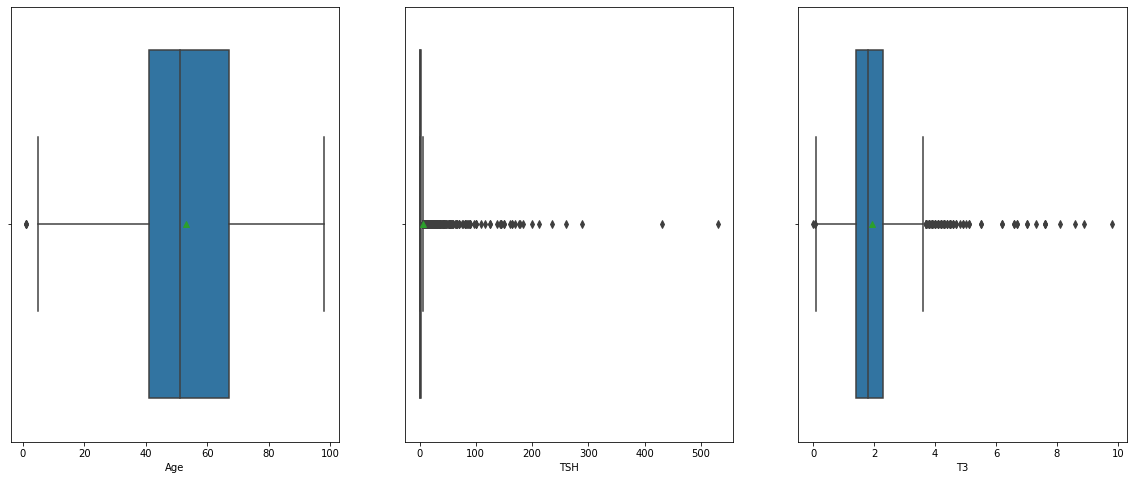

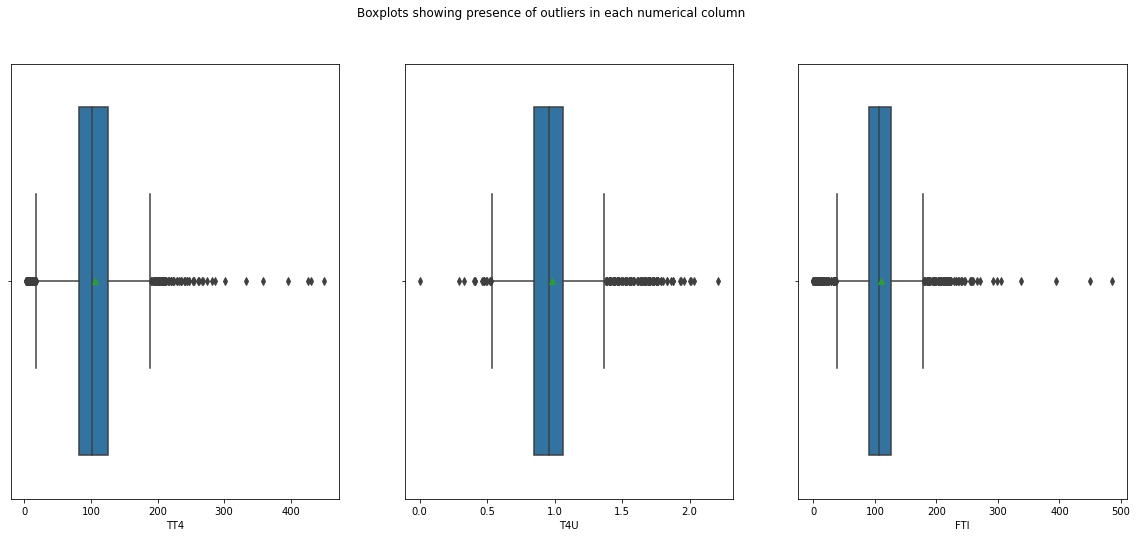

In [ ]:
#checking for outliers and anomalies in numerical columns
# defining the sizes of our boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 8))
fig, (ax4, ax5,ax6) = plt.subplots(1,3, figsize=(20, 8))

# the title
fig.suptitle('Boxplots showing presence of outliers in each numerical column')

# plotting
sns.boxplot(x = hyp_drop['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = hyp_drop['T3'], ax=ax3, showmeans = True)
sns.boxplot(x = hyp_drop['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = hyp_drop['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x = hyp_drop['FTI'], ax=ax6, showmeans = True)
sns.boxplot(x = hyp_drop['Age'], ax=ax1, showmeans = True)

# showing our plots
plt.show()

There are outliers in all the numerical features. These will not be removed as they are a crucial part of the analysis.

In [ ]:
# columns
hyp_drop.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Age'],
      dtype='object')

### Categorical Data

In [ ]:
import seaborn as sns


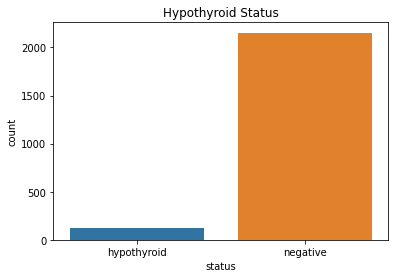

In [ ]:
# showing the distribution of people that tested negative and those that tested positive

sns.countplot(x = 'status',data = hyp_drop)
plt.title('Hypothyroid Status')
plt.show()


The number of people that tested positive with hypothyroid is way higher than those that tested negative.

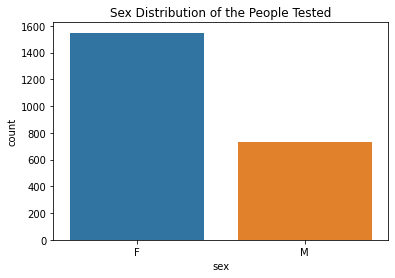

In [ ]:
# showing the distribution of gender/sex of people who were tested 

sns.countplot(x = 'sex',data = hyp_drop)
plt.title('Sex Distribution of the People Tested')
plt.show()


There were more females tested than the males

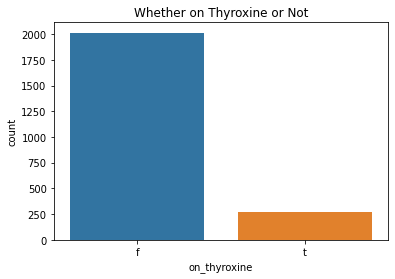

In [ ]:
# showing the distribution of people on thyroxine

sns.countplot(x = 'on_thyroxine',data = hyp_drop)
plt.title('Whether on Thyroxine or Not')
plt.show()


Most people were not on thyroxine; this could relate to the fact that most people tested negative 

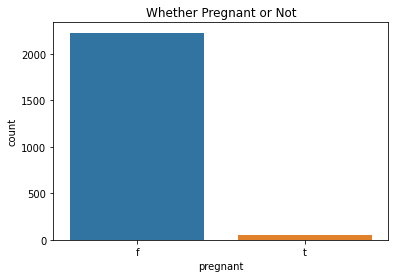

In [ ]:
# showing the distribution of pregnant people 

sns.countplot(x = 'pregnant',data = hyp_drop)
plt.title('Whether Pregnant or Not')
plt.show()


Most correspondents were not pregnant

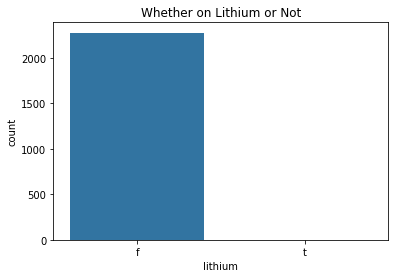

In [ ]:
# showing the distribution of people on lithium

sns.countplot(x = 'lithium',data = hyp_drop)
plt.title('Whether on Lithium or Not')
plt.show()


Most people were not on lithium 

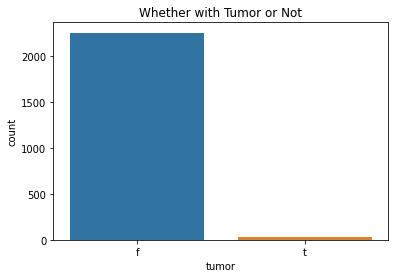

In [ ]:
# showing the distribution of people that had tumors

sns.countplot(x = 'tumor',data = hyp_drop)
plt.title('Whether with Tumor or Not')
plt.show()

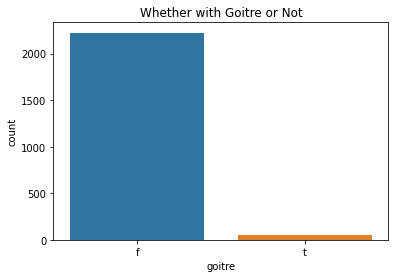

In [ ]:
# showing the distribution of people that had goitre

sns.countplot(x = 'goitre',data = hyp_drop)
plt.title('Whether with Goitre or Not')
plt.show()


Most people didnt have goitre

### Numerical Data

In [ ]:
# columns
hyp_drop.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Age'],
      dtype='object')

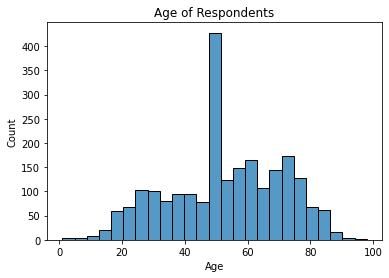

In [ ]:
# showing the distribution of age of respondents

sns.histplot(x = 'Age',data = hyp_drop)
plt.title('Age of Respondents')
plt.show()

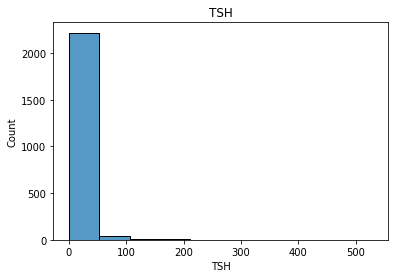

In [ ]:
# showing the distribution of TSH

sns.histplot(x = 'TSH',bins = 10, data = hyp_drop)
plt.title('TSH')
plt.show()

# The distribution is skewed to the left

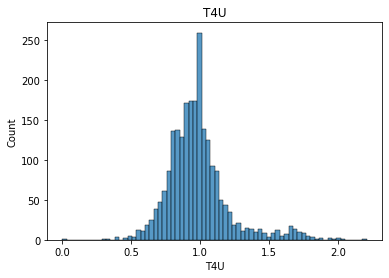

In [ ]:
# showing the distribution of T4U

sns.histplot(x = 'T4U',data = hyp_drop)
plt.title('T4U')
plt.show()

# the distrobution follows a near normal distrobution 

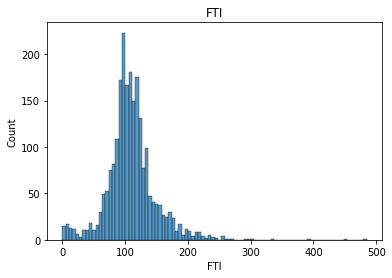

In [ ]:
# showing the distribution of FTI

sns.histplot(x = 'FTI',data = hyp_drop)
plt.title('FTI')
plt.show()

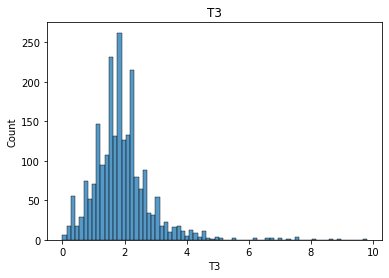

In [ ]:
# showing the distribution of T3

sns.histplot(x = 'T3',data = hyp_drop)
plt.title('T3')
plt.show()

### Bivariate Analysis

We first plot a correlation heatmap to see how the numerical variables relate

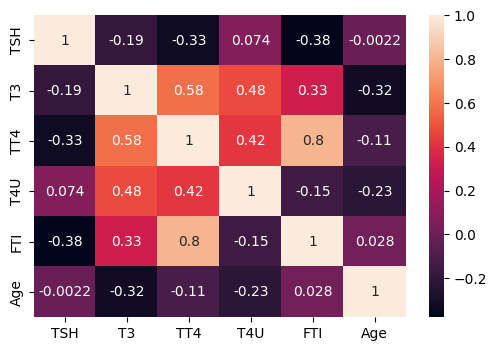

In [ ]:
# fig size
plt.figure(dpi = 100)

# plotting a correlation heatmap
sns.heatmap(hyp_drop.corr(),annot=True)

# showing
plt.show()

There is a strong positive correlation between the values of FTI and TT4 (0.8), between TT4 and T3 (0.58). 

The variables that have the weakest correlation are Age and TSH, (0.0022)

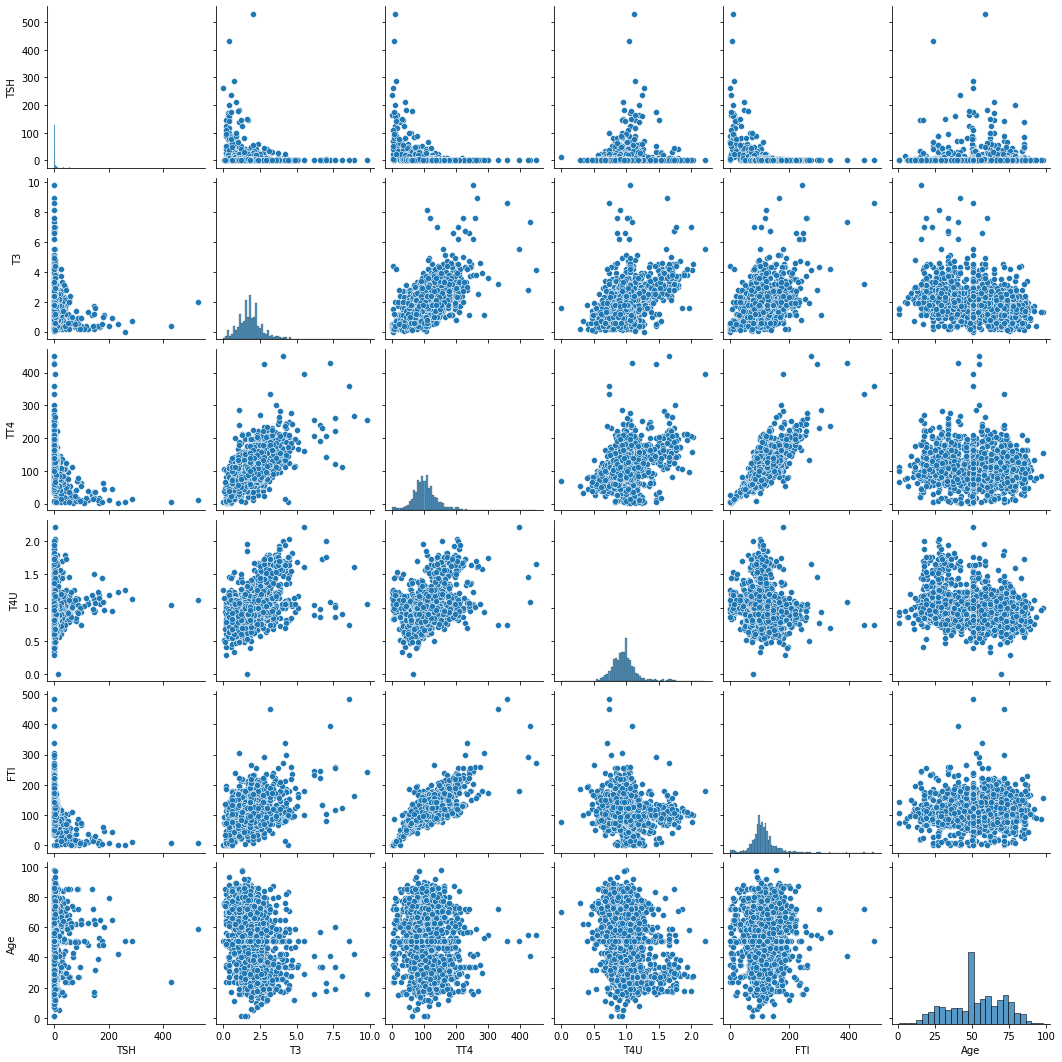

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(hyp_drop)
plt.show()

There are no strong correlations within the variables

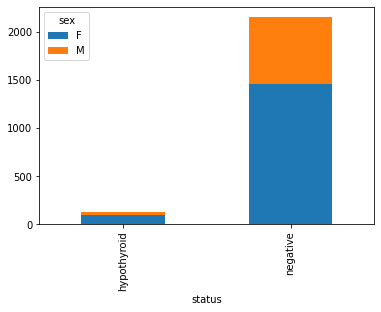

In [ ]:
# Showing the distribution of the number of hypothyroid infections among different genders
hyp_drop.groupby(['status','sex']).size().unstack().plot(kind='bar',stacked=True)

# showing
plt.show()


The number of females that tested negative were higher than those of males.

The number of females that had hypothyroid was higher than the males.

More females tested negative than with hypothyroid.

More males tested negative than with hypothyroid.

### Modelling

In [ ]:
# creating a copy of the dataframe fro modeling
hypo_copy = hyp_drop.copy()

In [ ]:
hypo_copy.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Age'],
      dtype='object')

##### Mapping Function

In [ ]:
# confirm data types

hypo_copy.dtypes

status                       category
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
FTI                           float64
Age                           float64
dtype: object

In [ ]:
# checking the first five records
hypo_copy.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


In [ ]:
# checking the last five records
hypo_copy.tail()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
3158,negative,F,f,f,f,f,f,f,f,f,f,f,f,5.8,1.7,86.0,0.91,95.0,58.0
3159,negative,F,f,f,f,f,f,f,f,f,f,f,f,0.8,1.8,99.0,1.01,98.0,29.0
3160,negative,M,f,f,f,f,f,f,f,f,f,f,f,1.2,0.6,71.0,0.68,104.0,77.0
3161,negative,F,f,f,f,f,f,f,f,f,f,f,f,1.3,0.1,65.0,0.48,137.0,74.0
3162,negative,F,t,f,f,f,f,f,f,f,f,f,f,0.0,1.8,139.0,0.97,143.0,56.0


In [ ]:
hypo_copy.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Age'],
      dtype='object')

Converting categorical entries into numerical data

In [ ]:
#Converting Hypothyroid and negative values in the status column to numerical values using the map function.
hypo_copy['status'] = hypo_copy['status'].map({'hypothyroid': 1, 'negative': 0})

In [ ]:
# Converting Male and Female values in the sex column to numerical values using the map function.
hypo_copy['sex'] =hypo_copy['sex'].map({'M':0, 'F':1})

In [ ]:
# We use the map function to converting false and true values in the columns to numerical values
true_false = ['on_thyroxine', 'sick', 'tumor', 'lithium', 'goitre','query_hypothyroid','query_on_thyroxine',
              'on_antithyroid_medication', 'thyroid_surgery', 'query_hyperthyroid', 'pregnant']

true_false_mapping = {'f':0, 't':1}

for col in true_false:
  hypo_copy[col] = hypo_copy[col].map(true_false_mapping)


In [ ]:
# previewing
hypo_copy.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,72.0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,15.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,24.0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,24.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,77.0


## Decision Trees

In [ ]:
# Split the independent and dependent variables
# We want to predict the status whether "status"

# our dependent / target variable
y = hypo_copy['status'].values

# our independent variables
test_features = hypo_copy.columns.to_list()
test_features.remove('status')


In [ ]:
# checking the test features
test_features

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'Age']

In [ ]:
# using these specifically chosen independent variables
X = hypo_copy[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Baseline Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor #from sklearn.ensemble import DecisionTreeRegressor


In [ ]:
# Create a decision tree classifier as our baseline model
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

In [ ]:
# converting our predictions into a dataframe
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})

In [ ]:
# previewing
comparison_frame.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# evaluating our accuracy
print("R2 score : %.2f" % r2_score(y_test,y_pred_tree))

print('accuracy_score:',accuracy_score (y_test , y_pred_tree))

#since our data is unbalanced, we compute for f1-score
print('F1_score, average = micro:',f1_score(y_test, y_pred_tree, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_tree, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_tree, average='weighted'))

R2 score : 0.69
accuracy_score: 0.9824561403508771
F1_score, average = micro: 0.9824561403508771
F1_score, average = macro: 0.9120370370370371
F1_score, average = weighted: 0.9814205653021444


In [ ]:
# Assesing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

Mean Absolute Error: 0.017543859649122806
Mean Squared Error: 0.017543859649122806
Root Mean Squared Error: 0.13245323570650439


### Random Forest Classifier

In [ ]:
# creating our random forest
forest = RandomForestClassifier(n_estimators = 100, random_state=2, min_samples_split = 20, max_depth=5)

forest = forest.fit(X_train, y_train)

# min_samples_split = 20

In [ ]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# converting our predictions into a dataframe
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
# previewing
comparison_frame.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# evaluating our accuracy
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#since our data is unbalanced, we compute for f1-score
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

R2 score : 0.69
accuracy_score: 0.9824561403508771
F1_score, average = micro: 0.9824561403508771
F1_score, average = macro: 0.9120370370370371
F1_score, average = weighted: 0.9814205653021444


In [ ]:
# Assesing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.017543859649122806
Mean Squared Error: 0.017543859649122806
Root Mean Squared Error: 0.13245323570650439


Our prediction has a very high accuracy score which is an implication that our model could be biased. Our accuracy score and errors can be manipulated by changing the value of n_estimators, or minimum sample split or maximum depth.

The random forest classifier gives us the exact accuracy scores and errors as the baseline regression model.

In [ ]:
# To visualize our random forest we need to make some library imports
from sklearn.tree import export_graphviz
from six import StringIO   
from IPython.display import Image  
import pydotplus

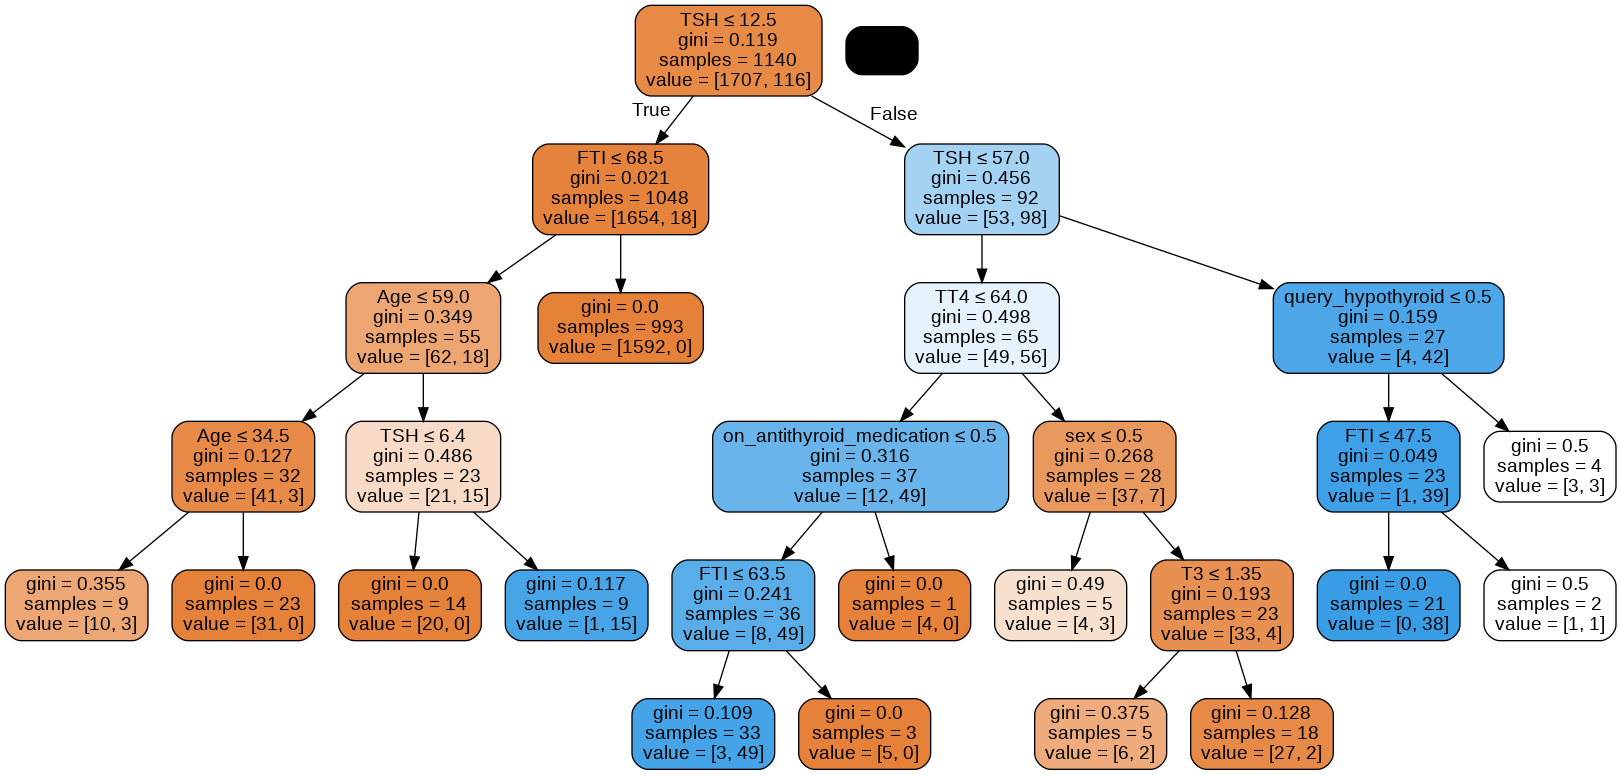

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())


In [ ]:
# Computing numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('sex', 0.01), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.03), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.72), ('T3', 0.0), ('TT4', 0.11), ('T4U', 0.0), ('FTI', 0.09), ('Age', 0.03)]

Variable: TSH                  Importance: 0.72
Variable: TT4                  Importance: 0.11
Variable: FTI                  Importance: 0.09
Variable: on_antithyroid_medication Importance: 0.03
Variable: Age                  Importance: 0.03
Variable: sex                  Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor

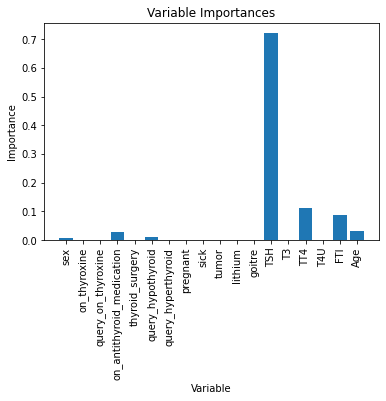

In [ ]:
# plotting the importances
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

To predict status, we need TSH,TT4, and FTI.

### Gradient Boost

In [ ]:
# Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# creating my model
grad_boost = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=4,min_samples_split=3)

In [ ]:
#  fiiting my train subset in the classifier

grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=3)

In [ ]:
# making predictions based on our model
y_pred_grad = grad_boost.predict(X_test)

In [ ]:
# testing the accuracy of our model
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred_grad))

gradient_Accuracy: 0.9846491228070176


In [ ]:
# Computing the confusion matrix to figure out how many times our model is correct
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_grad))

Confusion matrrix: [[427   2]
 [  5  22]]


We've made 449 right predictions and 7 wrong predictions

### ADA Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor #, DecisionTreeRegressor


In [ ]:
# computing ada boost 
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)


In [ ]:
# predicting y values
y_pred_ada = ada_boost.predict(X_test)


In [ ]:
# testing our accuracy score
accuracy_score(y_test, y_pred_ada)

0.9846491228070176

In [ ]:
# putting the learning rate as 1.0 and n stimators as 100

ada_boost = AdaBoostClassifier(learning_rate=1.0,n_estimators=300,random_state= 20)

# fitting the model
ada_boost = ada_boost.fit(X_train, y_train)

# making our prediction
y_pred_ada = ada_boost.predict(X_test)

# testing the accuracyof our prediction
print(accuracy_score(y_test, y_pred_ada))

0.9714912280701754


In [ ]:
# tweaking our ada boost model
# using different values for maximum depth and n stimators

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), 
                               n_estimators=80,random_state= 20)

# fitting the model
ada_boost = ada_boost.fit(X_train, y_train)

# making our prediction
y_pred_ada = ada_boost.predict(X_test)

# testing the accuracyof our prediction
print(accuracy_score(y_test, y_pred_ada))

0.9824561403508771


The accuracy of our model changes with change in n estimators and max depth.

### Support Vector Machine

#### Linear Kernel SVM

In [331]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9780701754385965

In [324]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9780701754385965
F1_score, average = macro: 0.8806032677000419
F1_score, average = weighted: 0.9757044737944569


#### Radial Basis Function (RBF) SVM

In [325]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9407894736842105

In [326]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9407894736842105
F1_score, average = macro: 0.48474576271186437
F1_score, average = weighted: 0.9120874219446922


#### Kernel Polynomial SVM

In [327]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.05921052631578947

In [329]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

F1_score, average = micro: 0.05921052631578947
F1_score, average = macro: 0.055900621118012424
F1_score, average = weighted: 0.006619810395554103


The linear kernel had the highest accuracy score of 98%, followed by the RBF with 94% and the polynomial kernel had the least accuracy score of 6%.

### Challenging the Solution

We had the right dataset though the analysis / prediction could have been better if the dataset had less or no missing values.

Being a medical dataset, we are limited to making assumptions and computing sensitive values like age as this could give biased results.

The high accuracy scores put the prediction at a risk of overfitting.

### Conclusion and Recommendation

The models with the highest accuracy scores are: Random Forest Classifier, Gradient Boost, ADA Boost and Linear Kernel SVM with accuracy scores of 98%.

The least accurate model is the Kernel Polynomial SVM with an accuracy score of 6%.

There is no optimal accuracy score for any of the models in this analysis. 
The models that have high accuracy scores could lead to overfitting whereas the polynomial model with a very low score could lead to underfitting.

The company should consider providing sufficient data for an approriate model to be built.

The company should also provide a dataset description as there were so many features that were not understood during analysis.